In [9]:
import pandas as pd
import ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

C:\Users\richa\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [10]:
start_date = '2014-11-12'
end_date = '2024-11-16'
ticker = 'TATAMOTORS.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2014-11-12 00:00:00+00:00,522.745422,526.205933,531.202332,516.361511,517.845581,3617680
2014-11-13 00:00:00+00:00,517.732788,521.160034,530.311890,517.895081,527.343689,2799445
2014-11-14 00:00:00+00:00,514.931580,518.340271,531.103394,514.135376,524.227112,4717775
2014-11-17 00:00:00+00:00,535.916016,539.463684,541.739319,514.481689,514.481689,7159194
2014-11-18 00:00:00+00:00,532.328552,535.852417,544.855896,534.764099,542.827637,4548021


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2472 entries, 2014-11-12 00:00:00+00:00 to 2024-11-14 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Adj Close, TATAMOTORS.NS)  2472 non-null   float64
 1   (Close, TATAMOTORS.NS)      2472 non-null   float64
 2   (High, TATAMOTORS.NS)       2472 non-null   float64
 3   (Low, TATAMOTORS.NS)        2472 non-null   float64
 4   (Open, TATAMOTORS.NS)       2472 non-null   float64
 5   (Volume, TATAMOTORS.NS)     2472 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.2 KB


In [12]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2.472000e+03
mean,413.969705,416.089528,422.296747,410.584246,417.001841,2.320369e+07
std,222.793834,223.096215,225.440064,220.968676,223.681212,3.000427e+07
min,64.896851,65.300003,66.900002,63.500000,66.500000,9.445510e+05
25%,265.587601,267.237488,271.962502,262.537498,269.425003,7.216536e+06
50%,409.257568,411.799988,417.824997,406.574997,412.350006,1.215303e+07
75%,496.341614,499.425003,507.912498,492.786362,501.566315,2.625359e+07
max,1161.849976,1161.849976,1179.000000,1145.300049,1167.000000,3.905778e+08


In [13]:
print("Mean of closing price: ", df['Close'].mean())
print("Median of closing price: ", df['Close'].median())
print("Standard deviation of closing price: ", df['Close'].std())
print("Maximum value Of closing price: ",df['Close'].max())
print("Mininum value Of closing price: ",df['Close'].min())

Mean of closing price:  Ticker
TATAMOTORS.NS    416.089528
dtype: float64
Median of closing price:  Ticker
TATAMOTORS.NS    411.799988
dtype: float64
Standard deviation of closing price:  Ticker
TATAMOTORS.NS    223.096215
dtype: float64
Maximum value Of closing price:  Ticker
TATAMOTORS.NS    1161.849976
dtype: float64
Mininum value Of closing price:  Ticker
TATAMOTORS.NS    65.300003
dtype: float64


In [14]:
print("Mean of Opening price: ", df['Open'].mean())
print("Median of Opening price: ", df['Open'].median())
print("Standard deviation of Opening price: ", df['Open'].std())
print("Maximum value Of Opening price: ",df['Open'].max())
print("Mininum value Of Opening price: ",df['Open'].min())

Mean of Opening price:  Ticker
TATAMOTORS.NS    417.001841
dtype: float64
Median of Opening price:  Ticker
TATAMOTORS.NS    412.350006
dtype: float64
Standard deviation of Opening price:  Ticker
TATAMOTORS.NS    223.681212
dtype: float64
Maximum value Of Opening price:  Ticker
TATAMOTORS.NS    1167.0
dtype: float64
Mininum value Of Opening price:  Ticker
TATAMOTORS.NS    66.5
dtype: float64


In [15]:
# Percent Return Of Closing Price
returns = df['Close'].pct_change()
returns.head()

Ticker,TATAMOTORS.NS
Date,
2014-11-12 00:00:00+00:00,NaN
2014-11-13 00:00:00+00:00,-0.009589
2014-11-14 00:00:00+00:00,-0.005411
2014-11-17 00:00:00+00:00,0.040752
2014-11-18 00:00:00+00:00,-0.006694


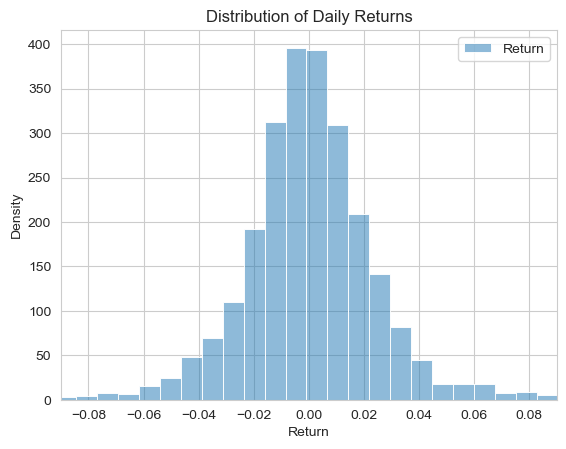

In [16]:
sns.histplot(returns[1:], bins=50,label='Return')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

In [17]:
print(returns.idxmin())
print(returns.idxmax())

Ticker
TATAMOTORS.NS   2019-02-08 00:00:00+00:00
dtype: datetime64[ns, UTC]
Ticker
TATAMOTORS.NS   2021-10-13 00:00:00+00:00
dtype: datetime64[ns, UTC]


In [18]:
Chart = df[["Open", "High", "Low", "Close"]].loc['2018-01-01':'2024-01-01']


# Step 6: Check the structure of the Chart DataFrame

print(Chart)

print(Chart.columns)  # Check the column names

print(Chart.isnull().sum())  # Check for NaN values


# Flatten MultiIndex if it exists

if isinstance(Chart.columns, pd.MultiIndex):

    Chart.columns = [' '.join(col).strip() for col in Chart.columns.values]


# Step 7: Plot the candlestick chart

if not Chart.empty:

    Chart.iplot(kind='candle', title='Candlestick Chart for TATAMOTORS', xTitle='Date', yTitle='Price')

else:

    print("The DataFrame is empty. Please check your date range.")

Price                              Open          High           Low  \
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                  
2018-01-01 00:00:00+00:00    430.950012    436.399994    422.250000   
2018-01-02 00:00:00+00:00    428.850006    440.850006    422.000000   
2018-01-03 00:00:00+00:00    440.399994    441.399994    431.950012   
2018-01-04 00:00:00+00:00    430.000000    433.299988    425.750000   
2018-01-05 00:00:00+00:00    431.250000    436.350006    429.799988   
...                                 ...           ...           ...   
2023-12-26 00:00:00+00:00    727.400024    727.500000    716.599976   
2023-12-27 00:00:00+00:00    728.000000    741.849976    725.150024   
2023-12-28 00:00:00+00:00    742.650024    757.950012    739.049988   
2023-12-29 00:00:00+00:00    755.000000    802.900024    754.000000   
2024-01-01 00:00:00+00:00    785.000000    798.700012    781.049988   

Price

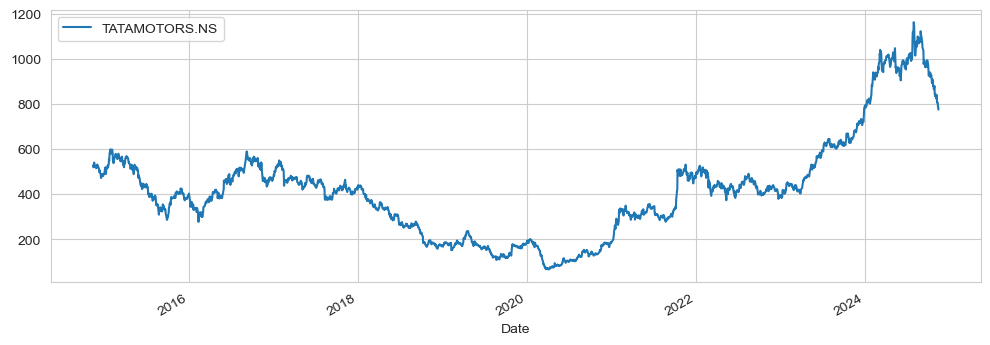

In [19]:
Closed_price = df['Close']
Closed_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

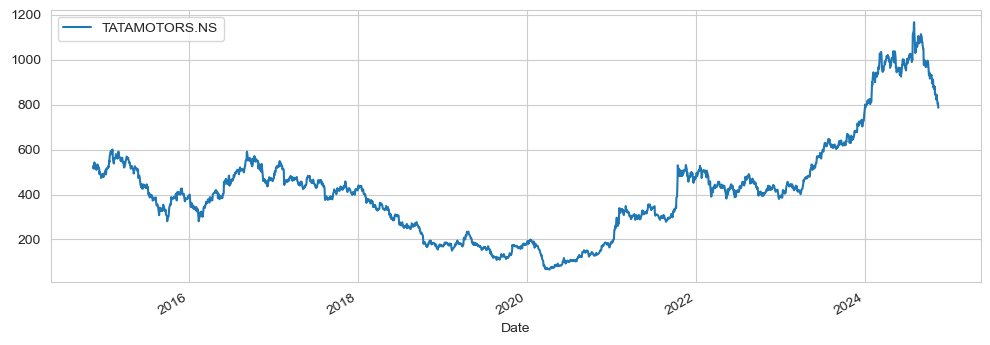

In [20]:
Open_price = df['Open']
Open_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

In [21]:
df[['Open','Close']].iplot()

<Figure size 1200x400 with 0 Axes>

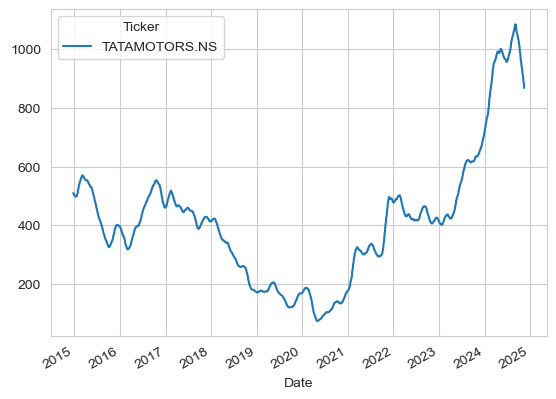

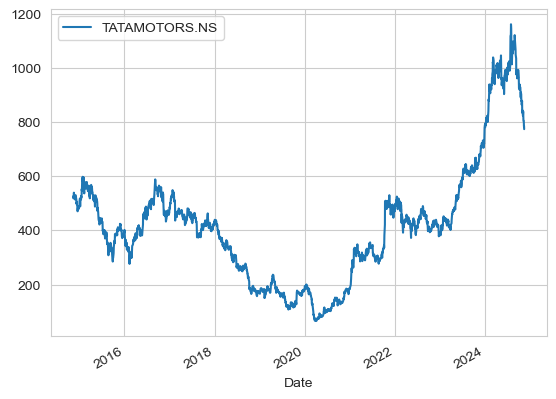

In [22]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label='30 day Moving Average')
df['Close'].plot(label='TATA Motors Close')
plt.legend()

In [23]:
Moving_Avg = df['Open'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg,Open_price,on = 'Date')
New_df.rename(columns = {'Open_x':'Moving 30 Day Avg'}, inplace = True)
New_df.rename(columns = {'Open_y':'Open Price'}, inplace = True)
New_df.iplot()

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

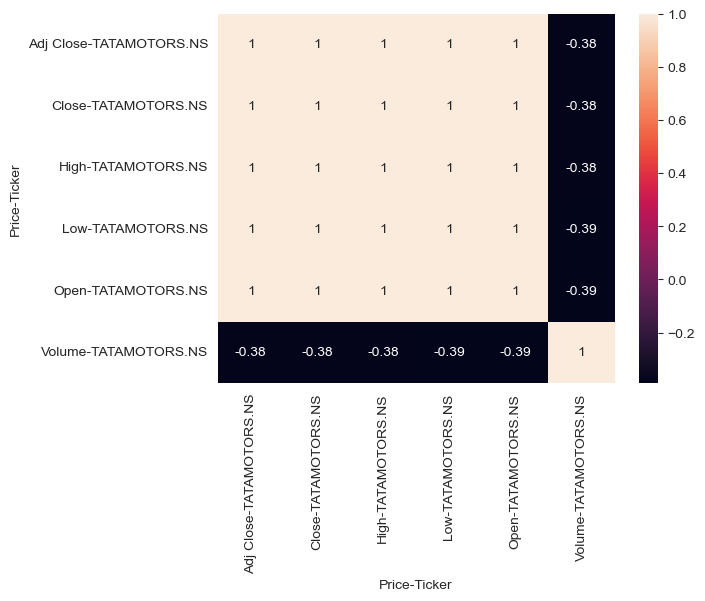

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df['Close'].loc['2024-01-01':'2025-01-30'].ta_plot(study='sma',periods=[7,21,55])

In [26]:
df[['Open']].loc['2024-01-30':'2025-01-30'].ta_plot(study='boll')

In [27]:
df[['Close']].loc['2024-01-30':'2025-01-30'].ta_plot(study='boll')

In [28]:
df['ma_7'] = df['Close'].rolling(window=7).mean()

In [29]:
df['ma_20'] = df['Close'].rolling(window=20).mean()

df['std_20'] = df['Close'].rolling(window=20).std()

df['upper_band'] = df['ma_20'] + 2 * df['std_20']

df['lower_band'] = df['ma_20'] - 2 * df['std_20']

In [30]:
df.columns

MultiIndex([( 'Adj Close', 'TATAMOTORS.NS'),
            (     'Close', 'TATAMOTORS.NS'),
            (      'High', 'TATAMOTORS.NS'),
            (       'Low', 'TATAMOTORS.NS'),
            (      'Open', 'TATAMOTORS.NS'),
            (    'Volume', 'TATAMOTORS.NS'),
            (      'ma_7',              ''),
            (     'ma_20',              ''),
            (    'std_20',              ''),
            ('upper_band',              ''),
            ('lower_band',              '')],
           names=['Price', 'Ticker'])

In [31]:
df = df.drop(['High', 'Low','Adj Close'],axis=1)

In [32]:
df.isnull().sum()

Price       Ticker       
Close       TATAMOTORS.NS     0
Open        TATAMOTORS.NS     0
Volume      TATAMOTORS.NS     0
ma_7                          6
ma_20                        19
std_20                       19
upper_band                   19
lower_band                   19
dtype: int64

In [33]:
import numpy as np
import pandas as pd
import math

def fill_na_mean_closest_two(col):
    """
    Fills missing values in the column by taking the mean of the two closest non-null values.
    """
    not_null = col.notnull()
    idx = col.index[not_null]
    val = col.loc[not_null].values
    
    filled = col.copy()
    for i, row in col[~not_null].iteritems():
        j = np.searchsorted(idx, i, side='left')
        
        # Check if j is 0 or j is out of bounds
        if j == 0 or j == len(idx):
            # No valid non-null values to average
            continue
        
        # Determine the closest non-null values
        if j > 0 and (j == len(idx) or math.fabs(i - idx[j-1]) < math.fabs(i - idx[j])):
            j -= 1
        
        # Check if we can access j-1 and j
        if j - 1 >= 0 and j < len(val):
            filled.loc[i] = (val[j-1] + val[j]) / 2
            
    return filled


In [34]:
df = df.apply(fill_na_mean_closest_two)

In [35]:
df.dropna(inplace=True)
df.head()

Price,Close,Open,Volume,ma_7,ma_20,std_20,upper_band,lower_band
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,,,,,
Date,,,,,,,,
2014-12-09 00:00:00+00:00,497.909424,511.760864,5562200,518.156538,521.518683,8.961741,539.442164,503.595201
2014-12-10 00:00:00+00:00,505.577179,490.736359,5621126,514.623008,520.487245,9.560960,539.609165,501.365326
2014-12-11 00:00:00+00:00,498.552521,501.421753,4069618,511.082415,519.356870,10.740851,540.838571,497.875168
2014-12-12 00:00:00+00:00,494.644440,493.605591,3900394,506.976454,518.172078,12.082061,542.336200,494.007956
2014-12-15 00:00:00+00:00,488.708130,489.648041,3896475,502.199127,515.634300,12.689683,541.013667,490.254934


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

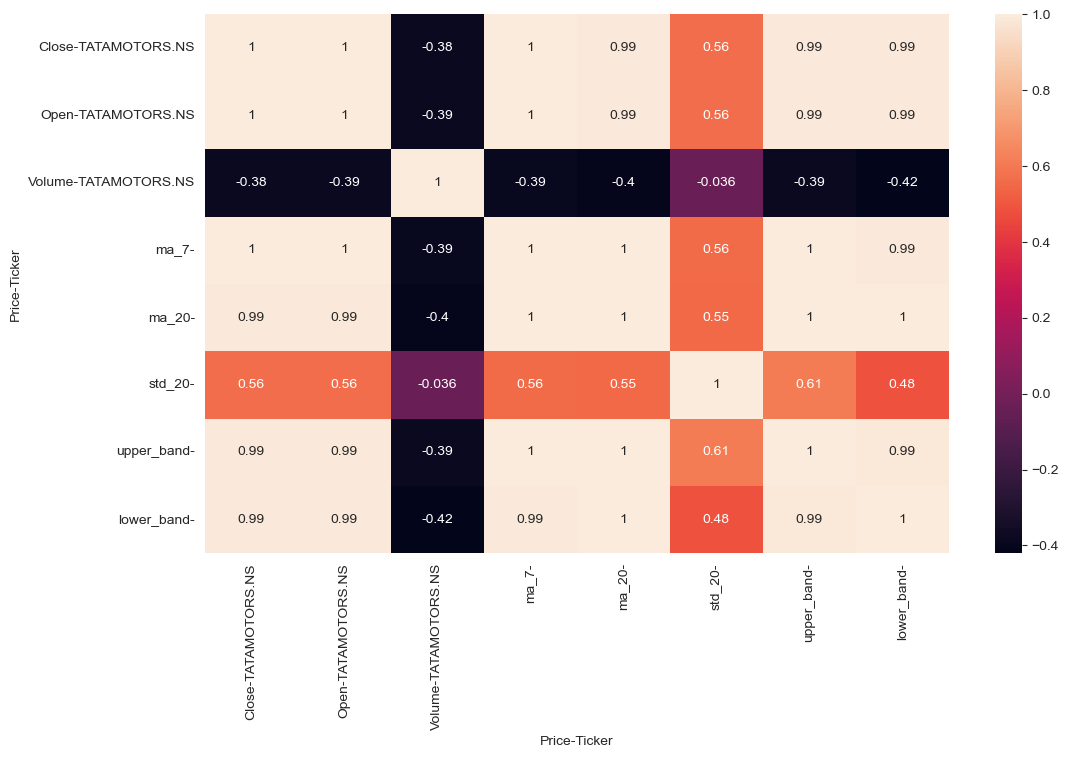

In [36]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [37]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

X_train = train_data.drop('Close',axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close',axis=1)
y_test = test_data['Close']

In [38]:
std = MinMaxScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [39]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [40]:
y_predict_lr = model_lr.predict(X_test)
y_predict_rf = model_rf.predict(X_test)
y_predict_svr = model_svr.predict(X_test)

In [41]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for linear regression:  0.9974567230182045
R2 score for random forest:  -0.29382696897646254
R2 score for SVR:  -2.6217344289475712


In [42]:
y_test_predict = y_predict_lr
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

R2_Score: 0.9974567230182045
MSE: 133.14890759937222
MAE: 8.195306166770505
RMSE: 11.53901675184555


In [43]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

,actual,prediction,difference
Date,,,
2022-11-21 00:00:00+00:00,421.1000061035156,425.2329714891773,-4.1329653856617
2022-11-22 00:00:00+00:00,424.7000122070312,421.0627378427831,3.6372743642482
2022-11-23 00:00:00+00:00,424.0499877929688,425.9967484016632,-1.9467606086944
2022-11-24 00:00:00+00:00,423.3999938964844,423.5887105036241,-0.1887166071397
2022-11-25 00:00:00+00:00,433.2000122070312,424.3990449843957,8.8009672226356
...,...,...,...
2024-11-08 00:00:00+00:00,805.4500122070312,820.2127241199630,-14.7627119129318
2024-11-11 00:00:00+00:00,804.7000122070312,801.6511544357733,3.0488577712580
2024-11-12 00:00:00+00:00,784.8499755859375,804.6512146503586,-19.8012390644211


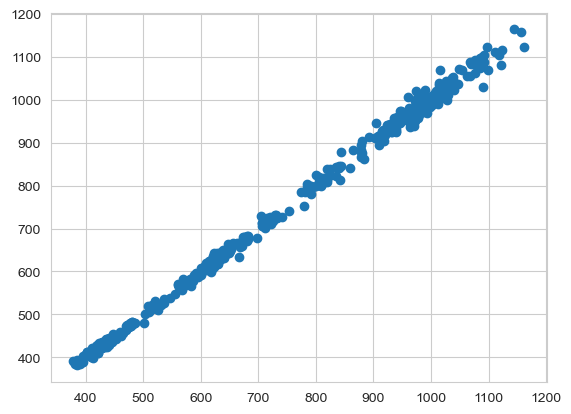

In [44]:
plt.scatter(y_test,y_test_predict)

In [45]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_test_predict)

In [46]:
mape

1.1093518121247254

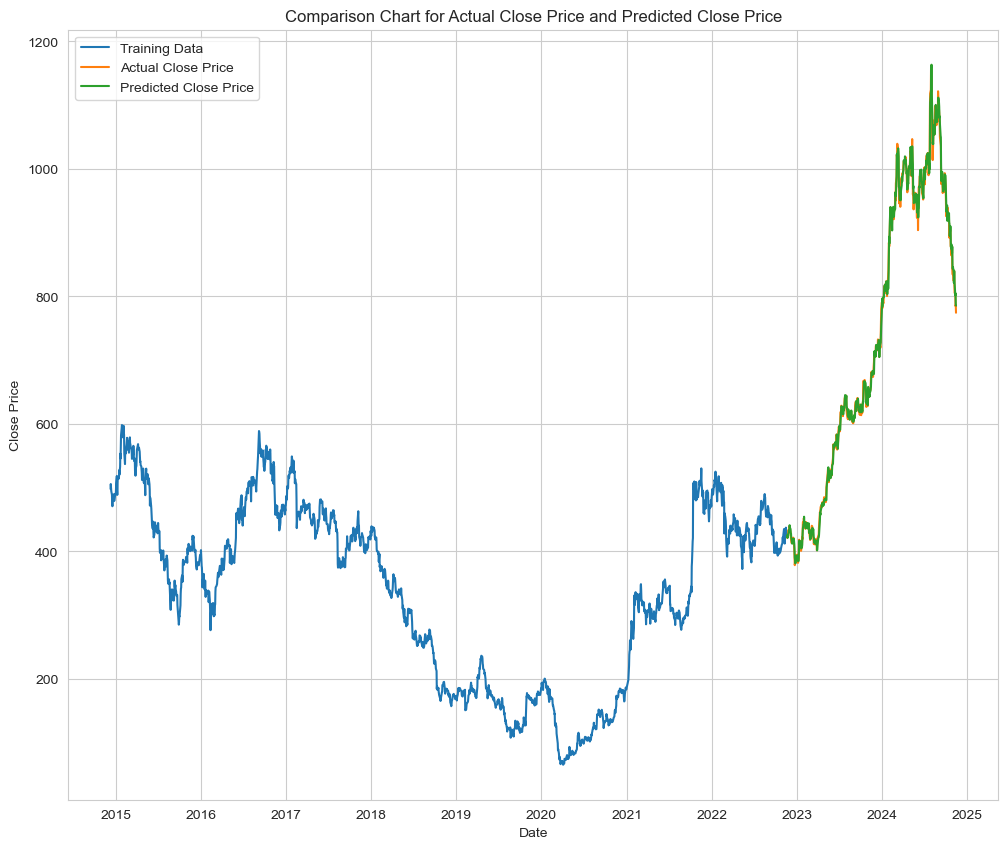

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.plot(y_train, label='Training Data')
plt.plot(test_check['actual'], label='Actual Close Price')
plt.plot(test_check['prediction'], label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Comparison Chart for Actual Close Price and Predicted Close Price')
plt.legend()
plt.show()